**USED CAR PRICE PREDICTION SYSTEM**

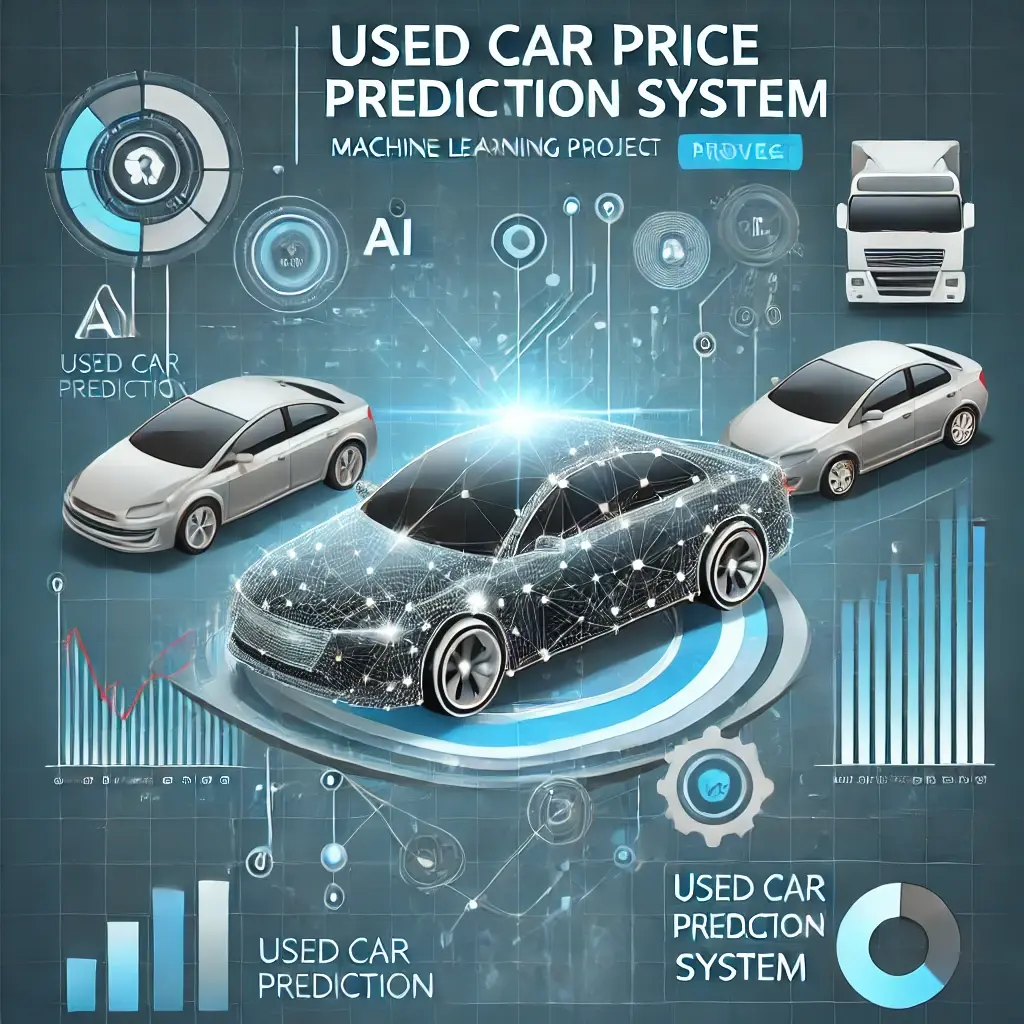

In [70]:

image_path = "carpic.png"  
display(Image(filename=image_path,width=600, height=50))


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [2]:
df = pd.read_csv('usedcars.csv')
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [4]:
 df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


In [6]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Observations:
vehicle_age:

Range: 0 to 29 years.
Mean: 6 years.
Vehicles are mostly mid-aged (IQR: 4–8 years).

km_driven:
Range: 100 km to 3.8 million km (!).
Mean: ~55,600 km.
The max value (3.8 million km) might be an outlier worth investigating.

mileage:
Range: 4 to 33.54 kmpl.
Mean: ~19.7 kmpl, which seems reasonable.
Low mileage values (<10) and high mileage (>30) may need closer inspection.

engine:
Range: 793 cc to 6592 cc.
Mean: ~1486 cc.
Engines below 800 cc or above 3000 cc are likely specific to small/large vehicle categories.

max_power:
Range: 38.4 to 626.
Mean: ~100.6.
Values above 400 seem like high-performance or luxury cars and might need separate analysis.

seats:
Range: 0 to 9 seats.
Median: 5 seats (most vehicles).
"0 seats" is likely an error and should be addressed.

selling_price:
Range: ₹40,000 to ₹3.95 crores.
Mean: ₹7.75 lakhs.
Very high prices could belong to luxury cars and may distort regression models.


In [8]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
df.duplicated().sum()

167

In [10]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column:{column}")
    print(f"Unique_values:{unique_values}")
    print(f"Total unique values:{len(unique_values)} /n")

Column:car_name
Unique_values:['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Skoda R

In [12]:
df = df.drop(columns=['car_name'])

In [13]:
df.head(1)

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000


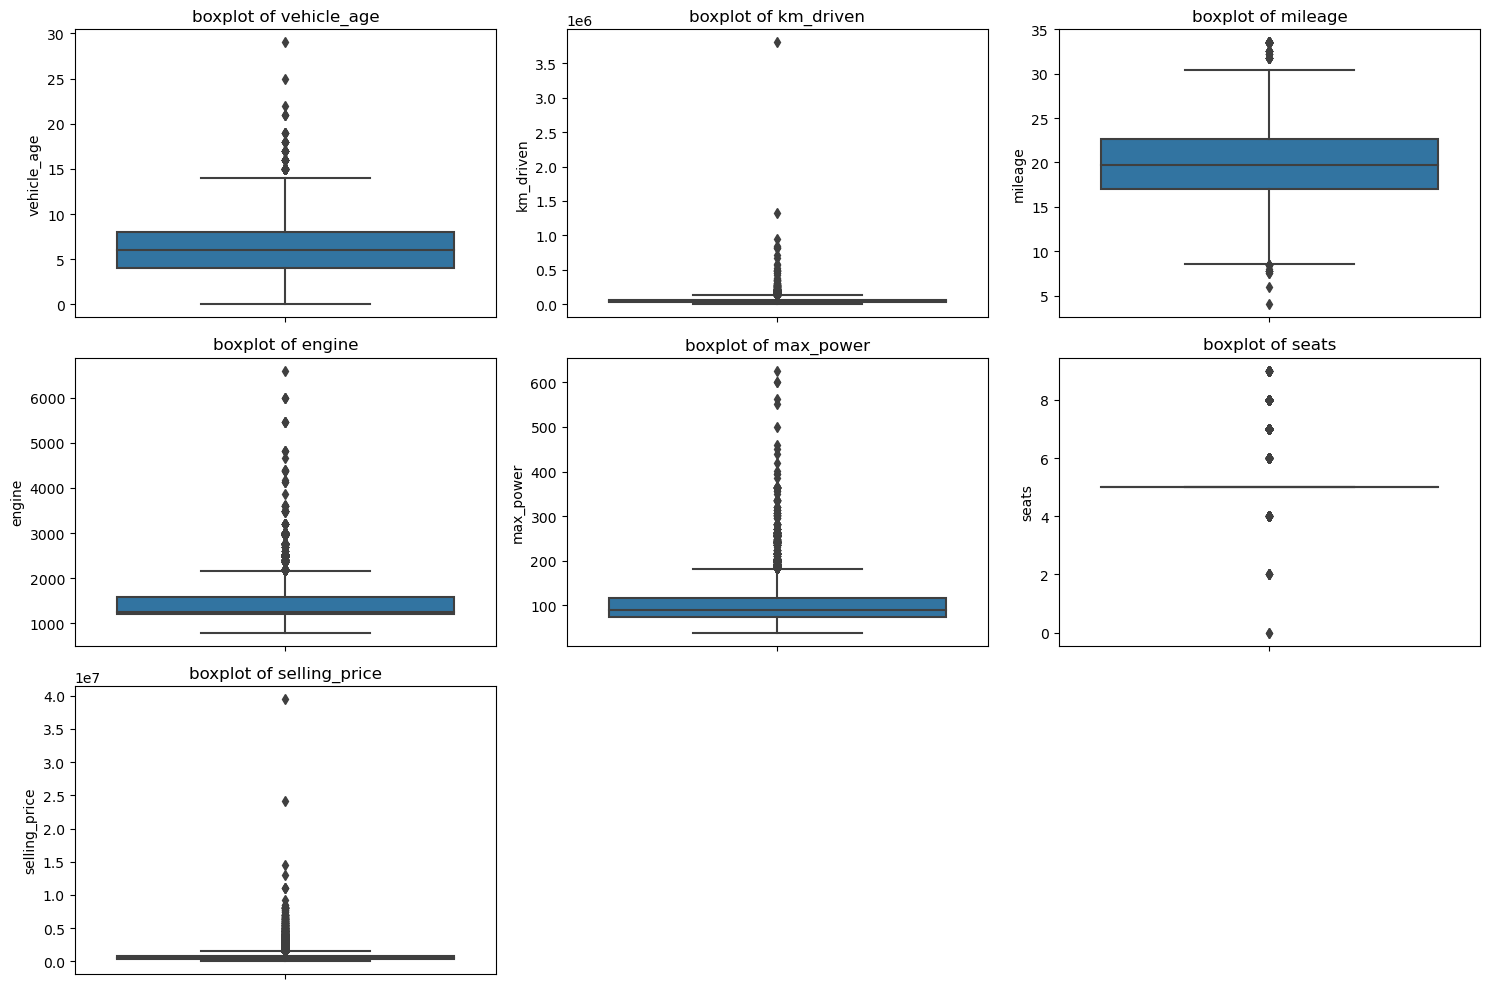

In [14]:
numerical_columns = [ 'vehicle_age','km_driven','mileage','engine','max_power',	'seats','selling_price']
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

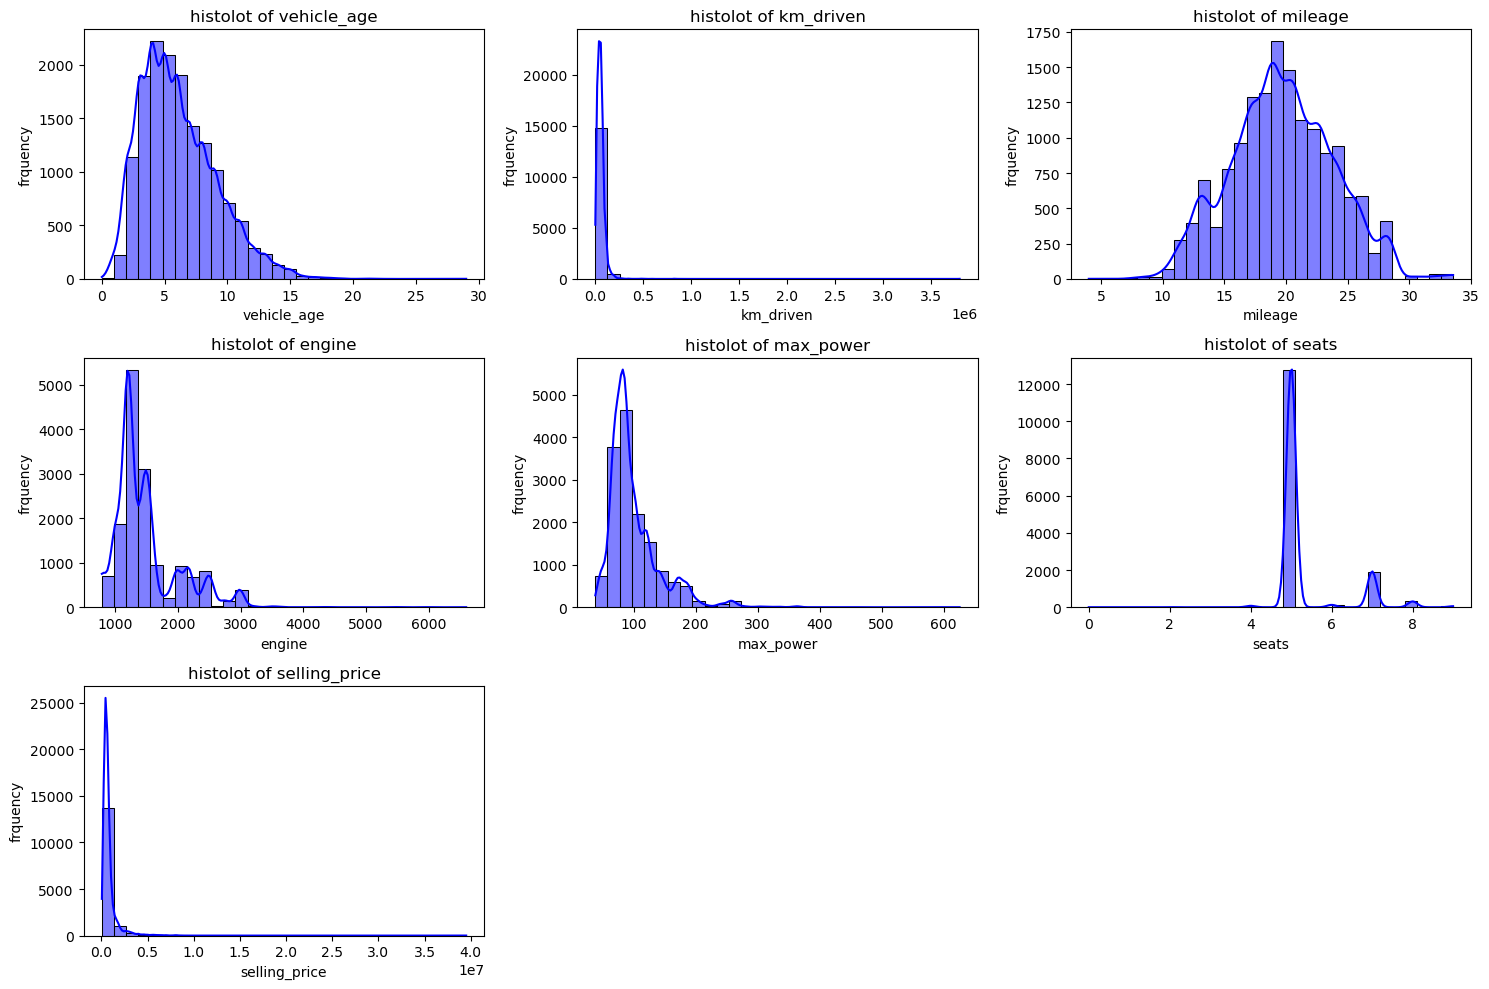

In [15]:
numerical_columns = [ 'vehicle_age','km_driven','mileage','engine','max_power',	'seats','selling_price']
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=30, color = 'blue')
    plt.title(f'histolot of {col}')
    plt.xlabel(col)
    plt.ylabel('frquency')
plt.tight_layout()
plt.show()

In [16]:
skewness = df[numerical_columns].skew()
skewness

vehicle_age       0.833522
km_driven        28.228987
mileage           0.110013
engine            1.669372
max_power         2.486647
seats             2.037977
selling_price    10.108896
dtype: float64

In [17]:


# Identify categorical columns
categorical_columns = ['model','brand', 'fuel_type', 'seller_type', 'transmission_type']

# Apply One-Hot Encoding for nominal features
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the updated dataframe
print(df_encoded.head())


   vehicle_age  km_driven  mileage  engine  max_power  seats  selling_price  \
0            9     120000    19.70     796      46.30      5         120000   
1            5      20000    18.90    1197      82.00      5         550000   
2           11      60000    17.00    1197      80.00      5         215000   
3            9      37000    20.92     998      67.10      5         226000   
4            6      30000    22.77    1498      98.59      5         570000   

   model_5  model_6  model_7  ...  brand_Toyota  brand_Volkswagen  \
0    False    False    False  ...         False             False   
1    False    False    False  ...         False             False   
2    False    False    False  ...         False             False   
3    False    False    False  ...         False             False   
4    False    False    False  ...         False             False   

   brand_Volvo  fuel_type_Diesel  fuel_type_Electric  fuel_type_LPG  \
0        False             False       

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')

X_train : (12195, 163)
X_test : (3049, 163)
y_train : (12195,)
X_test : (3049, 163)


In [20]:
X_train.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'model_5', 'model_6', 'model_7', 'model_A4',
       ...
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_type_Manual'],
      dtype='object', length=163)

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define the models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize a dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    model_performance[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

# Print the performance of each model
for model_name, performance in model_performance.items():
    print(f"{model_name}:")
    print(f"  MSE: {performance['MSE']:.2f}")
    print(f"  RMSE: {performance['RMSE']:.2f}")
    print(f"  R-squared: {performance['R-squared']:.2f}")
    print()


C:\Users\abhiw\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e+14, tolerance: 1.035e+12
  model = cd_fast.enet_coordinate_descent(


Linear Regression:
  MSE: 119587039205.27
  RMSE: 345813.59
  R-squared: 0.80

Ridge Regression:
  MSE: 122906698360.39
  RMSE: 350580.52
  R-squared: 0.80

Lasso Regression:
  MSE: 125024179545.66
  RMSE: 353587.58
  R-squared: 0.79

Random Forest:
  MSE: 85828503853.30
  RMSE: 292965.02
  R-squared: 0.86

Gradient Boosting:
  MSE: 85116171954.86
  RMSE: 291746.76
  R-squared: 0.86

AdaBoost:
  MSE: 237005669154.47
  RMSE: 486832.28
  R-squared: 0.61

Support Vector Regression (SVR):
  MSE: 658689311302.54
  RMSE: 811596.77
  R-squared: -0.08

Decision Tree:
  MSE: 461704218428.36
  RMSE: 679488.20
  R-squared: 0.24

K-Nearest Neighbors:
  MSE: 235944302374.96
  RMSE: 485740.98
  R-squared: 0.61



Observations:

Random Forest:
R-squared: 0.87 (highest)
MSE: 78,724,828,020.72 (lowest)
RMSE: 280,579.45 (lowest)
Best model overall: It has the highest R-squared and lowest RMSE, making it the best choice.

Gradient Boosting:
R-squared: 0.86 (close to Random Forest)
RMSE: 293,286.17 (slightly higher than Random Forest)
A strong contender but slightly worse than Random Forest.

Linear Regression and Ridge Regression:
R-squared: 0.80
Good baseline models but underperform compared to ensemble models.

Lasso Regression:
Slightly worse than Linear and Ridge Regression due to lower R-squared (0.79).
Other Models:

AdaBoost, KNN, and SVR performed poorly, with low R-squared values and high RMSE.


In [24]:
import joblib

# Save the trained Random Forest model
joblib.dump(models['Random Forest'], 'best_model_random_forest.pkl')

print("Best model saved as 'best_model_random_forest.pkl'.")


Best model saved as 'best_model_random_forest.pkl'.


In [25]:
# Load the saved model
loaded_model = joblib.load('best_model_random_forest.pkl')
print("Model loaded successfully.")


Model loaded successfully.


In [26]:


# Load the dataset to extract unique values for categorical columns
df = pd.read_csv('usedcars.csv')  # Load your dataset

# Extract unique values for each categorical column
brands = df['brand'].unique()
models = df['model'].unique()
seller_types = df['seller_type'].unique()
fuel_types = df['fuel_type'].unique()
transmission_types = df['transmission_type'].unique()

# Define the single-step function
def predict_car_price():
    print("Enter the car details to predict the selling price:")
    
    # Collect user inputs
    print("Available Brands:", ", ".join(brands))
    brand = input("Brand (e.g., Maruti, Hyundai, etc.): ").lower()
    while brand not in [b.lower() for b in brands]:
        print("Invalid brand. Please choose from:", ", ".join(brands))
        brand = input("Brand (e.g., Maruti, Hyundai, etc.): ").lower()
    
    print("Available Models:", ", ".join(models))
    model = input("Model (e.g., Alto, i20): ").lower()
    while model not in [m.lower() for m in models]:
        print("Invalid model. Please choose from:", ", ".join(models))
        model = input("Model (e.g., Alto, i20): ").lower()

    vehicle_age = int(input("Vehicle Age (in years): "))
    km_driven = int(input("Kilometers Driven: "))
    mileage = float(input("Mileage (km/l): "))
    engine = int(input("Engine Capacity (CC): "))
    max_power = int(input("Maximum Power (BHP): "))
    seats = int(input("Number of Seats: "))

    print("Available Seller Types:", ", ".join(seller_types))
    seller_type = input("Seller Type (e.g., Individual, Dealer): ").lower()
    while seller_type not in [s.lower() for s in seller_types]:
        print("Invalid seller type. Please choose from:", ", ".join(seller_types))
        seller_type = input("Seller Type (e.g., Individual, Dealer): ").lower()

    print("Available Fuel Types:", ", ".join(fuel_types))
    fuel_type = input("Fuel Type (e.g., Petrol, Diesel, CNG, Electric): ").lower()
    while fuel_type not in [f.lower() for f in fuel_types]:
        print("Invalid fuel type. Please choose from:", ", ".join(fuel_types))
        fuel_type = input("Fuel Type (e.g., Petrol, Diesel, CNG, Electric): ").lower()

    print("Available Transmission Types:", ", ".join(transmission_types))
    transmission_type = input("Transmission Type (e.g., Manual, Automatic): ").lower()
    while transmission_type not in [t.lower() for t in transmission_types]:
        print("Invalid transmission type. Please choose from:", ", ".join(transmission_types))
        transmission_type = input("Transmission Type (e.g., Manual, Automatic): ").lower()

    # Create a user input dictionary
    user_data = {
        'brand': brand,
        'model': model,
        'vehicle_age': vehicle_age,
        'km_driven': km_driven,
        'mileage': mileage,
        'engine': engine,
        'max_power': max_power,
        'seats': seats,
        'seller_type': seller_type,
        'fuel_type': fuel_type,
        'transmission_type': transmission_type
    }
    
    # Convert to DataFrame
    user_df = pd.DataFrame([user_data])
    
    # Categorical columns to encode
    categorical_columns = ['model', 'brand', 'fuel_type', 'seller_type', 'transmission_type']
    
    # Apply One-Hot Encoding
    user_df_encoded = pd.get_dummies(user_df, columns=categorical_columns, drop_first=True)
    
    # Align with training columns
    user_df_encoded = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict the price
    predicted_price = loaded_model.predict(user_df_encoded)
    print("\nPredicted Price:", predicted_price[0])

# Call the function
predict_car_price()


Enter the car details to predict the selling price:
Available Brands: Maruti, Hyundai, Ford, Renault, Mini, Mercedes-Benz, Toyota, Volkswagen, Honda, Mahindra, Datsun, Tata, Kia, BMW, Audi, Land Rover, Jaguar, MG, Isuzu, Porsche, Skoda, Volvo, Lexus, Jeep, Maserati, Bentley, Nissan, ISUZU, Ferrari, Mercedes-AMG, Rolls-Royce, Force


Brand (e.g., Maruti, Hyundai, etc.):  Kia


Available Models: Alto, Grand, i20, Ecosport, Wagon R, i10, Venue, Swift, Verna, Duster, Cooper, Ciaz, C-Class, Innova, Baleno, Swift Dzire, Vento, Creta, City, Bolero, Fortuner, KWID, Amaze, Santro, XUV500, KUV100, Ignis, RediGO, Scorpio, Marazzo, Aspire, Figo, Vitara, Tiago, Polo, Seltos, Celerio, GO, 5, CR-V, Endeavour, KUV, Jazz, 3, A4, Tigor, Ertiga, Safari, Thar, Hexa, Rover, Eeco, A6, E-Class, Q7, Z4, 6, XF, X5, Hector, Civic, D-Max, Cayenne, X1, Rapid, Freestyle, Superb, Nexon, XUV300, Dzire VXI, S90, WR-V, XL6, Triber, ES, Wrangler, Camry, Elantra, Yaris, GL-Class, 7, S-Presso, Dzire LXI, Aura, XC, Ghibli, Continental, CR, Kicks, S-Class, Tucson, Harrier, X3, Octavia, Compass, CLS, redi-GO, Glanza, Macan, X4, Dzire ZXI, XC90, F-PACE, A8, MUX, GTC4Lusso, GLS, X-Trail, XE, XC60, Panamera, Alturas, Altroz, NX, Carnival, C, RX, Ghost, Quattroporte, Gurkha


Model (e.g., Alto, i20):  Sonet


Invalid model. Please choose from: Alto, Grand, i20, Ecosport, Wagon R, i10, Venue, Swift, Verna, Duster, Cooper, Ciaz, C-Class, Innova, Baleno, Swift Dzire, Vento, Creta, City, Bolero, Fortuner, KWID, Amaze, Santro, XUV500, KUV100, Ignis, RediGO, Scorpio, Marazzo, Aspire, Figo, Vitara, Tiago, Polo, Seltos, Celerio, GO, 5, CR-V, Endeavour, KUV, Jazz, 3, A4, Tigor, Ertiga, Safari, Thar, Hexa, Rover, Eeco, A6, E-Class, Q7, Z4, 6, XF, X5, Hector, Civic, D-Max, Cayenne, X1, Rapid, Freestyle, Superb, Nexon, XUV300, Dzire VXI, S90, WR-V, XL6, Triber, ES, Wrangler, Camry, Elantra, Yaris, GL-Class, 7, S-Presso, Dzire LXI, Aura, XC, Ghibli, Continental, CR, Kicks, S-Class, Tucson, Harrier, X3, Octavia, Compass, CLS, redi-GO, Glanza, Macan, X4, Dzire ZXI, XC90, F-PACE, A8, MUX, GTC4Lusso, GLS, X-Trail, XE, XC60, Panamera, Alturas, Altroz, NX, Carnival, C, RX, Ghost, Quattroporte, Gurkha


Model (e.g., Alto, i20):  Sonet


Invalid model. Please choose from: Alto, Grand, i20, Ecosport, Wagon R, i10, Venue, Swift, Verna, Duster, Cooper, Ciaz, C-Class, Innova, Baleno, Swift Dzire, Vento, Creta, City, Bolero, Fortuner, KWID, Amaze, Santro, XUV500, KUV100, Ignis, RediGO, Scorpio, Marazzo, Aspire, Figo, Vitara, Tiago, Polo, Seltos, Celerio, GO, 5, CR-V, Endeavour, KUV, Jazz, 3, A4, Tigor, Ertiga, Safari, Thar, Hexa, Rover, Eeco, A6, E-Class, Q7, Z4, 6, XF, X5, Hector, Civic, D-Max, Cayenne, X1, Rapid, Freestyle, Superb, Nexon, XUV300, Dzire VXI, S90, WR-V, XL6, Triber, ES, Wrangler, Camry, Elantra, Yaris, GL-Class, 7, S-Presso, Dzire LXI, Aura, XC, Ghibli, Continental, CR, Kicks, S-Class, Tucson, Harrier, X3, Octavia, Compass, CLS, redi-GO, Glanza, Macan, X4, Dzire ZXI, XC90, F-PACE, A8, MUX, GTC4Lusso, GLS, X-Trail, XE, XC60, Panamera, Alturas, Altroz, NX, Carnival, C, RX, Ghost, Quattroporte, Gurkha


Model (e.g., Alto, i20):  Carnival
Vehicle Age (in years):  2
Kilometers Driven:  20000
Mileage (km/l):  10
Engine Capacity (CC):  2000
Maximum Power (BHP):  200
Number of Seats:  7


Available Seller Types: Individual, Dealer, Trustmark Dealer


Seller Type (e.g., Individual, Dealer):  Individual


Available Fuel Types: Petrol, Diesel, CNG, LPG, Electric


Fuel Type (e.g., Petrol, Diesel, CNG, Electric):  Diesel


Available Transmission Types: Manual, Automatic


Transmission Type (e.g., Manual, Automatic):  Automatic



Predicted Price: 3462450.0
